# Production Sequencing
## Problem Definition
A manufacturer of the metal sector in Stafford manufactures four types of products in sequence on two machines. The Table below provides the necessary technical production details.Taking into account only the data on the production times per product and the maximum daily production capacity of each machine, and taking a maximum daily production of 100 units of each product type, consider and solve a maximal flow model in a graph to determine the maximum number of minutes during which machines 1 and 2 can operate on a production-in-sequence basis given the existing capacity constraints.

| Machine | Product 1 | Product 2 | Product 3 | Product 4 | Daily Production Capacity (minutes) |
|---------|-----------|-----------|-----------|-----------|-------------------------------------|
| 1       | 2         | 3         | 4         | 2         | 500                                 |
| 2       | 3         | 2         | 1         | 2         | 380                                 |

## Solution
This is an example of how graph theory can be used to solve production sequencing problems. In this case, the resource that we want to optimise is machine time. The flow in our graph is going to represent machine time and the unit is going to be minutes. We will have a source node, one node representing the first step of the sequence (machine 1), four nodes representing the different products to be manufactured, another node for the second step of the process (machine 2), and a sink node. The capacity of the edge between the source node and the Machine 1 node is equal to the machine production capacity (500), since it is the total number of minutes that we can use in that machine. The capacities of edges between the machine 1 node and the products nodes are the production times in that machine times the number of units (200, 300, 400, 200), since it is the maximum time that we can invest in each time of product in machine 1. Likewise, the edges between the product nodes and the machine 2 node are 300, 200, 100, and 200, and the capacity of the edge between the machine 2 node and the sink node is 380.


{('S', 'M1'): Text(0.5,1,'500'),
 ('M1', 'P1'): Text(1.5,0.5,'200'),
 ('M1', 'P2'): Text(1.5,0.835,'300'),
 ('M1', 'P3'): Text(1.5,1.165,'400'),
 ('M1', 'P4'): Text(1.5,1.5,'200'),
 ('P1', 'M2'): Text(2.5,0.5,'300'),
 ('P2', 'M2'): Text(2.5,0.835,'200'),
 ('P3', 'M2'): Text(2.5,1.165,'100'),
 ('P4', 'M2'): Text(2.5,1.5,'200'),
 ('M2', 'T'): Text(3.5,1,'380')}

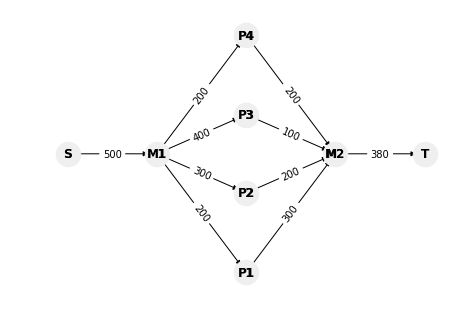

In [14]:
import pandas as pd
import networkx as nx
from IPython.display import display, Markdown

# Create an empty directed graph structure: 
G = nx.DiGraph()

# Add edges and define two attributes, production and costs:
G.add_edges_from([("S", "M1", {"capacity": 500, "production": 0}),
    ("M1", "P1", {"capacity": 200, "production": 2}),
    ("M1", "P2", {"capacity": 300, "production": 3}),
    ("M1", "P3", {"capacity": 400, "production": 4}),
    ("M1", "P4", {"capacity": 200, "production": 2}),
    ("P1", "M2", {"capacity": 300, "production": 3}),
    ("P2", "M2", {"capacity": 200, "production": 2}),
    ("P3", "M2", {"capacity": 100, "production": 2}),
    ("P4", "M2", {"capacity": 200, "production": 2}),
    ("M2", "T", {"capacity": 380, "production": 0})])

# Draw the directed graph
pos = {"S": (0, 1),
       "M1": (1, 1),
       "P1":(2,0),
       "P2": (2, 0.67),
       "P3": (2, 1.33),
       "P4": (2, 2),
       "M2": (3, 1),
       "T": (4, 1)   
      }

nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold' )
c_label = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=c_label)


In [15]:
value, flow = nx.maximum_flow(G, "S", "T", capacity='capacity' )
print(value)
display(flow)

380


{'S': {'M1': 380},
 'M1': {'P1': 80, 'P2': 200, 'P3': 100, 'P4': 0},
 'P1': {'M2': 80},
 'P2': {'M2': 200},
 'P3': {'M2': 100},
 'P4': {'M2': 0},
 'M2': {'T': 380},
 'T': {}}